In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
# Function to show an image
def imshow1(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
svhn_train = datasets.SVHN('~/.pytorch/SVHN_data/', split='train', download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(svhn_train, batch_size=32, shuffle=True)

# Download and load the test data
svhn_test = datasets.SVHN('~/.pytorch/SVHN_data/', split='test', download=True, transform=transform)
testloader = torch.utils.data.DataLoader(svhn_test, batch_size=32, shuffle=True)

Using downloaded and verified file: /root/.pytorch/SVHN_data/train_32x32.mat
Using downloaded and verified file: /root/.pytorch/SVHN_data/test_32x32.mat


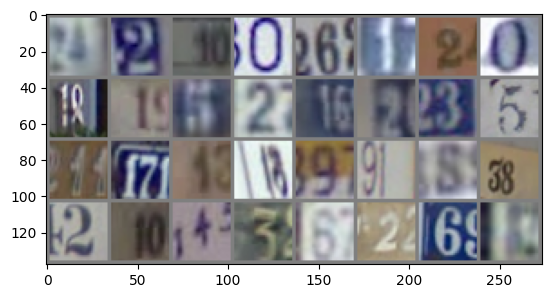

In [ ]:
# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow1(torchvision.utils.make_grid(images))

## LeNet

In [ ]:
# Define the LeNet architecture
class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Convolutional layers and pooling
        # Fully connected layers
        # 32 x 32 image
        self.net = nn.Sequential(nn.Conv2d(3, 6, kernel_size = 5, padding = 2), nn.ReLU(), # 6x32x32
                                 nn.AvgPool2d(kernel_size = 2, stride = 2), # 6x16x16
                                 nn.Conv2d(6, 16, kernel_size = 5), nn.ReLU(), # 16x12x12
                                 nn.AvgPool2d(kernel_size = 2, stride = 2), # 16x6x6
                                 nn.Flatten(),
                                 nn.Linear(576,120), nn.ReLU(),
                                 nn.Linear(120,84), nn.ReLU(),
                                 nn.Linear(84,10)
                                 )

    def forward(self, x):
        # Define the forward pass
        return self.net(x)

In [ ]:
# Instantiate the model
model = LeNet()
model = model.to('cuda')

# Set the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

## Train

In [ ]:
def train(model, train_loader, test_loader, criterion, optimizer, n_epochs):
    # Move the model to GPU
    model = model.to('cuda')

    model.train()

    for epoch in range(n_epochs):
        model.train()  # set the model to training mode
        epoch_loss_train = 0.0
        epoch_correct_train = 0
        total_samples_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to('cuda'), labels.to('cuda')

            optimizer.zero_grad()

            Label_pred = model.forward(inputs)
            L = criterion(Label_pred, labels)

            # Backpropagation
            L.backward()
            optimizer.step()

            # Calculate accuracy
            predicted_classes = torch.argmax(Label_pred, dim=1)
            correct = (predicted_classes == labels).float()
            accuracy = correct.sum()

            # Update the epoch loss and correct prediction count
            epoch_loss_train += L.item()
            epoch_correct_train += accuracy.item()
            total_samples_train += len(labels)

        model.eval()  # set the model to evaluation mode
        epoch_loss_test = 0.0
        epoch_correct_test = 0
        total_samples_test = 0
        with torch.no_grad():  # deactivate autograd engine to reduce memory usage and speed up computations
            for inputs, labels in test_loader:
                inputs, labels = inputs.to('cuda'), labels.to('cuda')
                Label_pred = model.forward(inputs)
                L = criterion(Label_pred, labels)

                # Calculate accuracy
                predicted_classes = torch.argmax(Label_pred, dim=1)
                correct = (predicted_classes == labels).float()
                accuracy = correct.sum()

                # Update the epoch loss and correct prediction count
                epoch_loss_test += L.item()
                epoch_correct_test += accuracy.item()
                total_samples_test += len(labels)

        print(f'epoch: {epoch}, Train Loss: {epoch_loss_train / len(train_loader)}, Test Loss: {epoch_loss_test / len(test_loader):.6f}, Train Accuracy: {100 * (epoch_correct_train / total_samples_train):.3f}%, Test Accuracy: {100 * (epoch_correct_test / total_samples_test):.3f}%')







In [ ]:
# Call the training function in a loop, for each epoch
train(model = model, train_loader = trainloader, test_loader = testloader, criterion = criterion, optimizer = optimizer, n_epochs = 20)

# Save the trained model
#torch.save(model.state_dict(), 'model.ckpt')


epoch: 0, Train Loss: 1.8489988032907378, Test Loss: 1.305620, Train Accuracy: 36.053%, Test Accuracy: 59.035%
epoch: 1, Train Loss: 1.0711279586673303, Test Loss: 0.963228, Train Accuracy: 67.396%, Test Accuracy: 71.331%
epoch: 2, Train Loss: 0.8202214219424402, Test Loss: 0.816481, Train Accuracy: 75.641%, Test Accuracy: 76.045%
epoch: 3, Train Loss: 0.7045334710044111, Test Loss: 0.728355, Train Accuracy: 79.366%, Test Accuracy: 79.314%
epoch: 4, Train Loss: 0.6354115948666652, Test Loss: 0.695300, Train Accuracy: 81.566%, Test Accuracy: 80.374%
epoch: 5, Train Loss: 0.5857577315877358, Test Loss: 0.665932, Train Accuracy: 83.010%, Test Accuracy: 81.338%
epoch: 6, Train Loss: 0.548317435243895, Test Loss: 0.632376, Train Accuracy: 84.105%, Test Accuracy: 82.164%
epoch: 7, Train Loss: 0.5171971266950973, Test Loss: 0.619154, Train Accuracy: 84.961%, Test Accuracy: 82.740%
epoch: 8, Train Loss: 0.4914365239116042, Test Loss: 0.593134, Train Accuracy: 85.738%, Test Accuracy: 83.405%
ep

Image 1: Predicted: 9, Original: 9


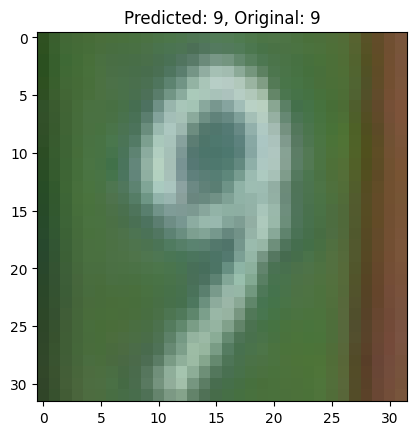

Image 2: Predicted: 1, Original: 7


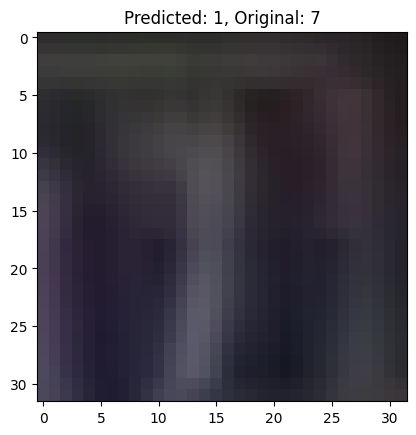

Image 3: Predicted: 2, Original: 2


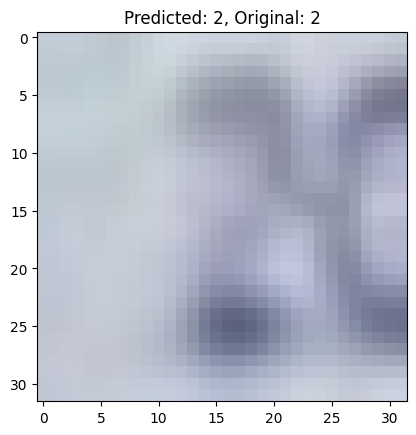

Image 4: Predicted: 8, Original: 8


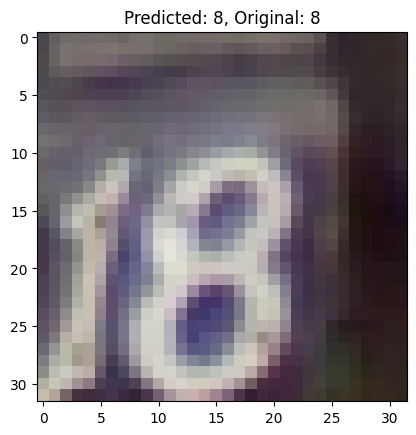

Image 5: Predicted: 3, Original: 3


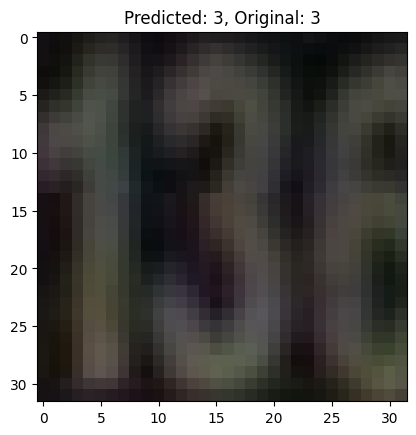

Image 6: Predicted: 5, Original: 5


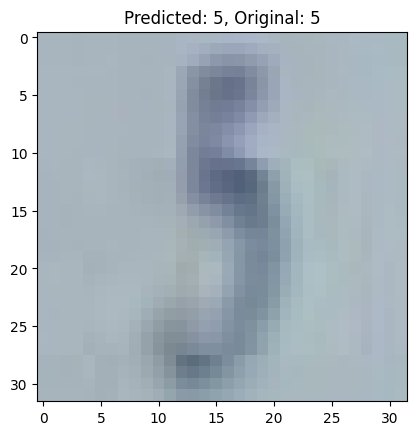

Image 7: Predicted: 3, Original: 3


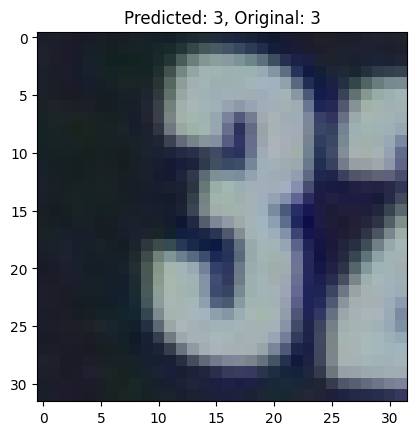

Image 8: Predicted: 1, Original: 1


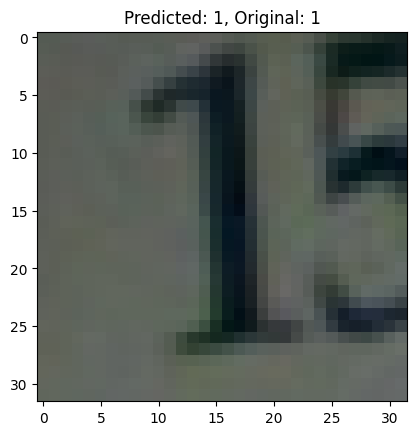

Image 9: Predicted: 1, Original: 1


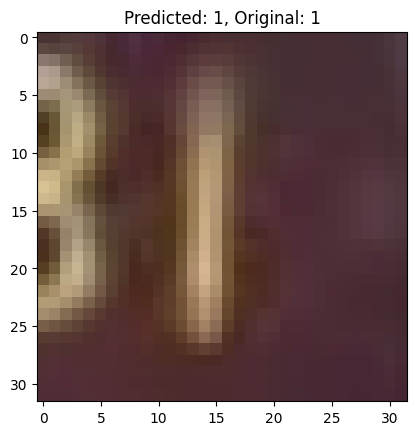

Image 10: Predicted: 1, Original: 1


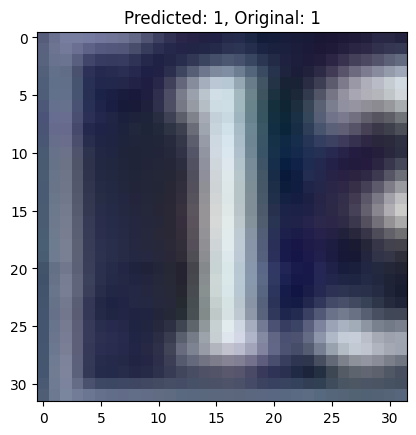

Image 11: Predicted: 8, Original: 8


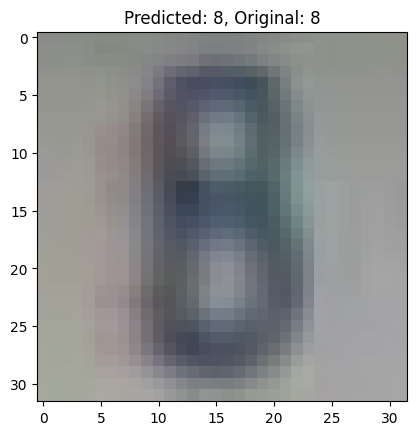

Image 12: Predicted: 3, Original: 7


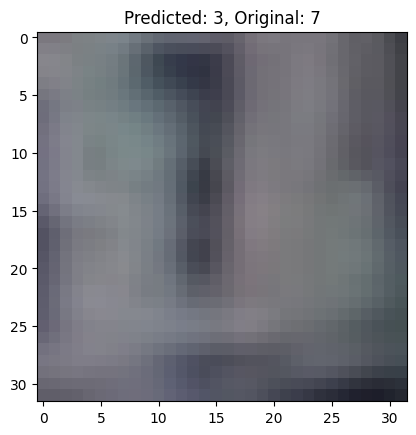

Image 13: Predicted: 5, Original: 5


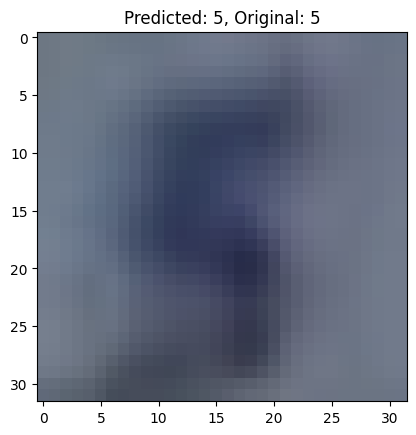

Image 14: Predicted: 5, Original: 5


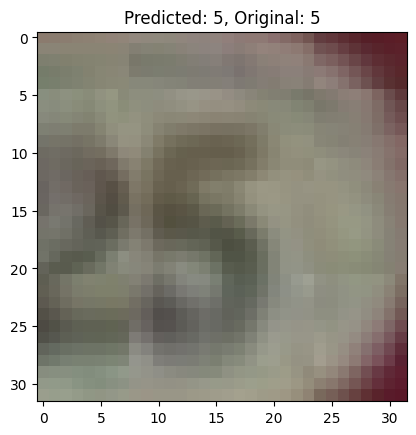

Image 15: Predicted: 3, Original: 3


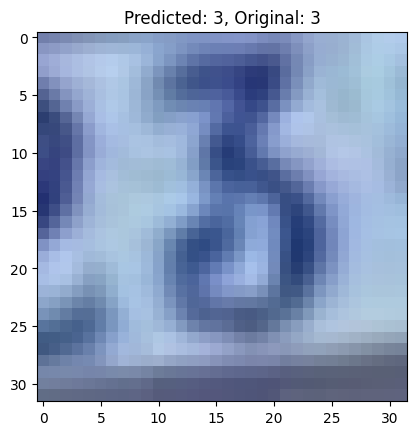

Image 16: Predicted: 7, Original: 7


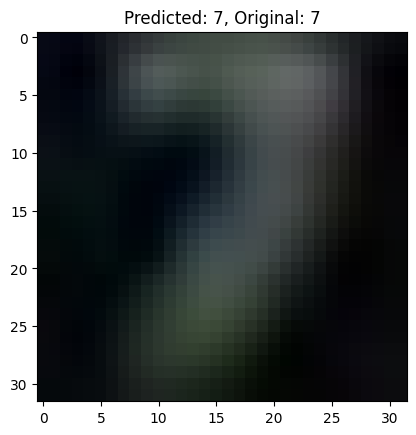

Image 17: Predicted: 2, Original: 2


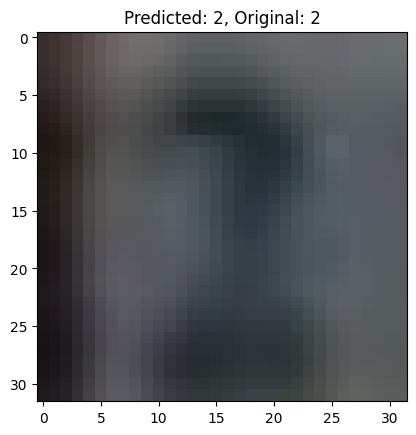

Image 18: Predicted: 9, Original: 9


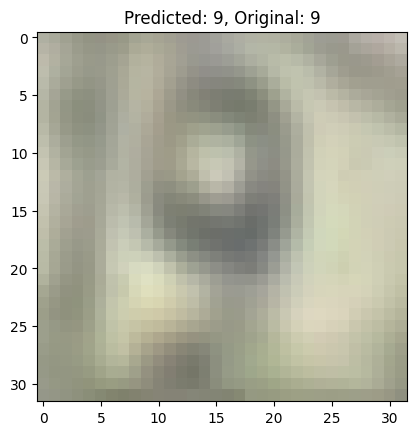

Image 19: Predicted: 4, Original: 4


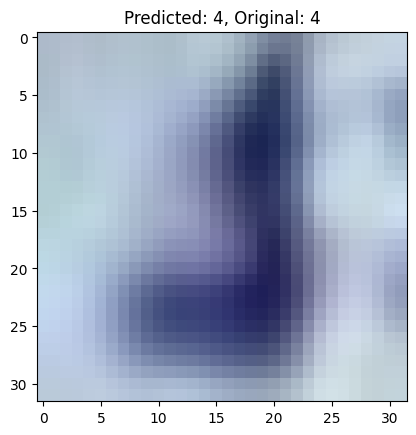

Image 20: Predicted: 0, Original: 0


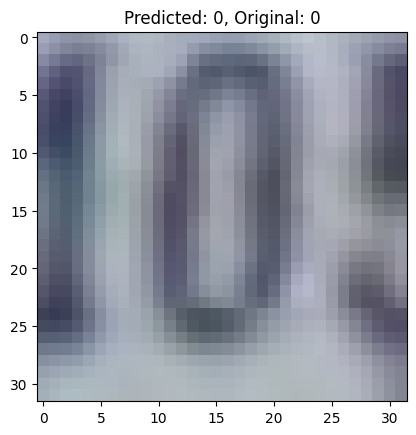

Image 21: Predicted: 4, Original: 4


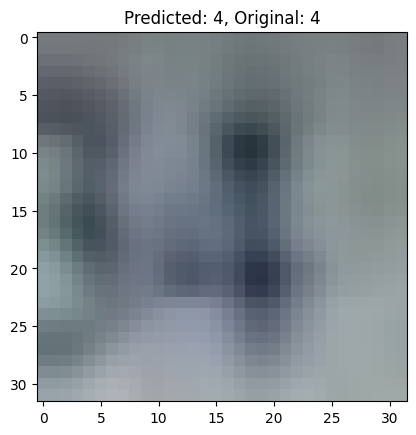

Image 22: Predicted: 7, Original: 7


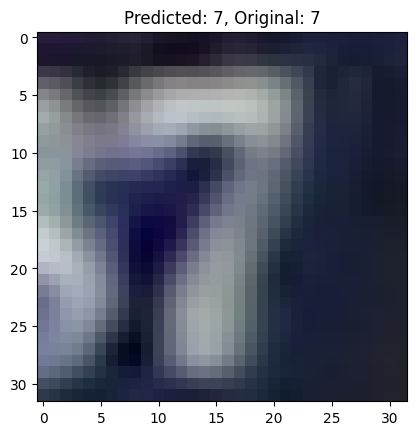

Image 23: Predicted: 7, Original: 3


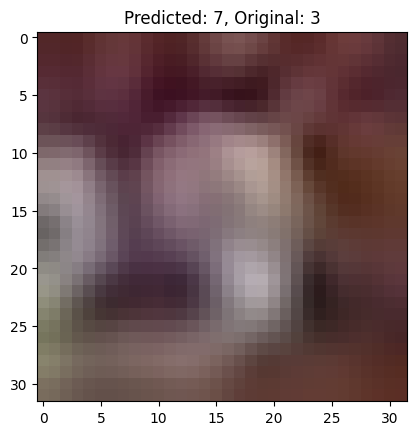

Image 24: Predicted: 3, Original: 3


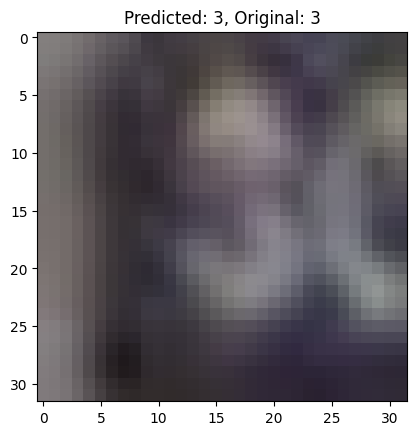

Image 25: Predicted: 1, Original: 1


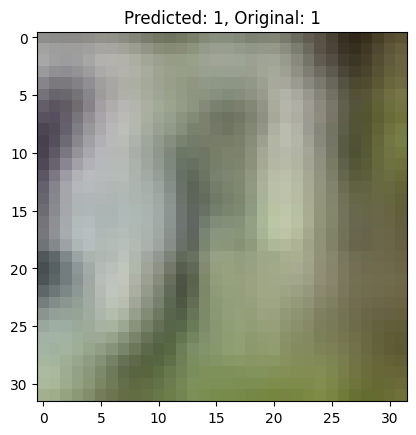

Image 26: Predicted: 1, Original: 1


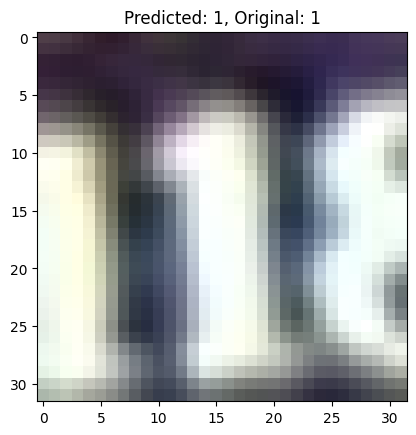

Image 27: Predicted: 4, Original: 4


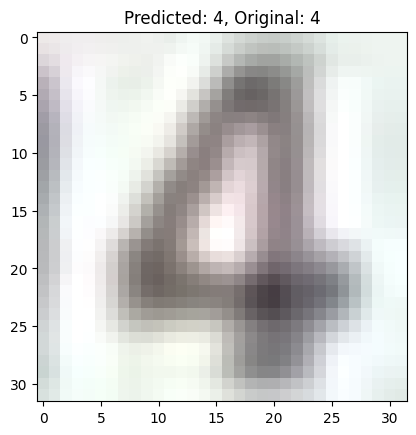

Image 28: Predicted: 6, Original: 6


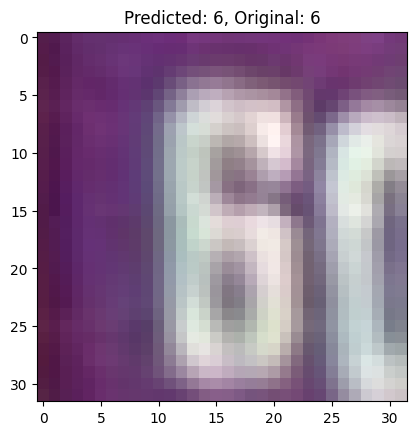

Image 29: Predicted: 1, Original: 1


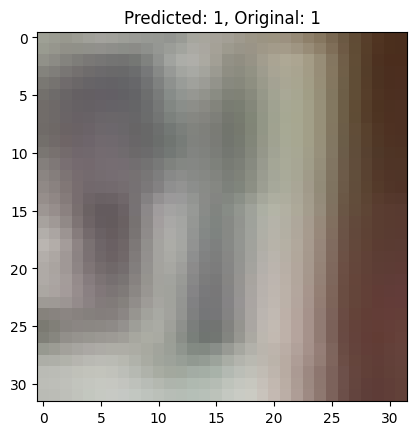

Image 30: Predicted: 3, Original: 3


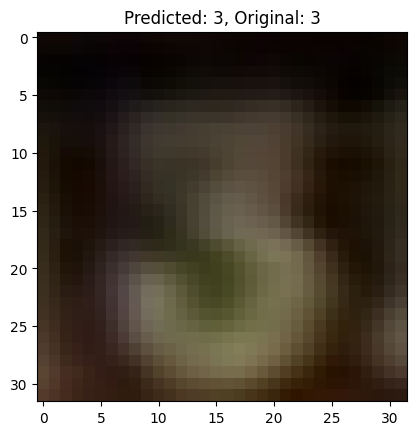

Image 31: Predicted: 3, Original: 3


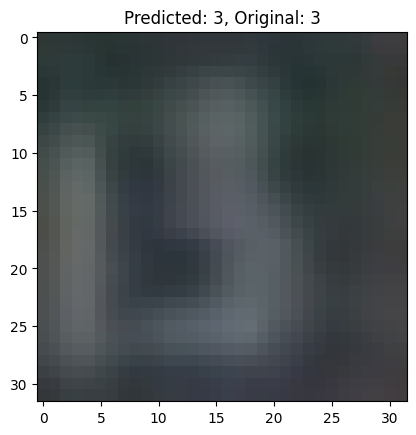

Image 32: Predicted: 6, Original: 6


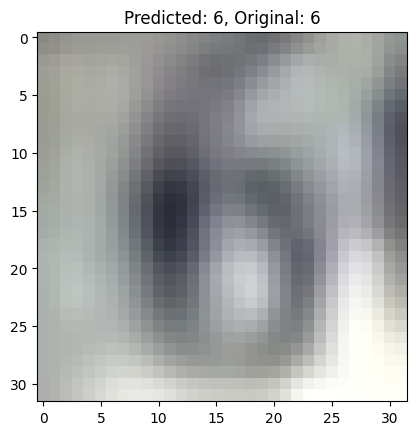

In [ ]:
# Get a batch of test data
def imshow(img, title):
    # unnormalize
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()
dataiter = iter(testloader)
images, labels = next(dataiter)

# Predict labels with the model
outputs = model(images.to('cuda'))
_, predicted = torch.max(outputs, 1)

# Loop through each image in the batch
for i in range(len(images)):
    image = images[i]
    label = labels[i].item()
    prediction = predicted[i].item()

    # Print the predicted and original labels
    print(f'Image {i+1}: Predicted: {prediction}, Original: {label}')

    # Show the image with the predicted and original labels as the title
    imshow(image, f'Predicted: {prediction}, Original: {label}')

# AlexNet

In [ ]:
# Define a transform to normalize the data
fashionmnist_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Download and load the training data
fashionmnist_trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=fashionmnist_transform)
trainloader_fashionmnist = torch.utils.data.DataLoader(fashionmnist_trainset, batch_size=32, shuffle=True)

# Download and load the test data
fashionmnist_testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=fashionmnist_transform)
testloader_fashionmnist = torch.utils.data.DataLoader(fashionmnist_testset, batch_size=32, shuffle=True)

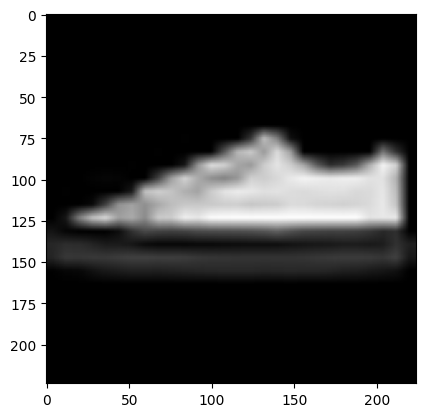

In [ ]:
# Get some random training images
dataiter = iter(trainloader_fashionmnist)
images, labels = next(dataiter)

# Show images
imshow1(torchvision.utils.make_grid(images[0,:,:,:]))

In [ ]:
labels

tensor([7, 5, 1, 3, 8, 3, 7, 8, 3, 3, 3, 6, 4, 2, 7, 7, 2, 6, 5, 1, 5, 9, 4, 9,
        4, 5, 1, 1, 8, 7, 1, 2])

In [ ]:
class AlexNet(nn.Module):
  def __init__(self):
    super().__init__()
    # 3x224x224
    self.net = nn.Sequential(nn.Conv2d(3,96, kernel_size=11, stride = 4), nn.ReLU(), # 96x54x54
                             nn.MaxPool2d(kernel_size = 3, stride = 2), # 96x26x26
                             nn.Conv2d(96, 256, kernel_size = 5, padding = 2), nn.ReLU(), #25626x26
                             nn.MaxPool2d(kernel_size = 3, stride = 2), # 256x12x12
                             nn.Conv2d(256, 384, kernel_size = 3, padding = 1), nn.ReLU(), # 384x12x12
                             nn.Conv2d(384, 384, kernel_size = 3, padding = 1), nn.ReLU(), # 384x12x12
                             nn.Conv2d(384, 256, kernel_size = 3, padding = 1), nn.ReLU(), # 256x12x12
                             nn.MaxPool2d(kernel_size = 3, stride = 2), # 256x5x5
                             nn.Flatten(),
                             nn.Linear(6400,4096),nn.ReLU(),nn.Dropout(p=0.5),
                             nn.Linear(4096, 4096), nn.ReLU(),nn.Dropout(p=0.5),
                             nn.Linear(4096,10))

  def forward(self,x):
    return self.net(x)

  def predict(self,x):
    outp = self.net(x)
    _, labels_pred = torch.max(outp, 1)
    return labels_pred

In [ ]:
def eval_acc(model, data_loader):

  with torch.no_grad():
    model.eval()

    total = 0
    correct = 0

    for (images, labels) in data_loader:
      images = images.cuda()
      labels = labels.cuda()

      labels_pred = model.predict(images)

      total += labels.shape[0]
      correct += (labels_pred == labels).sum().item()

    acc = 100 * correct / total

  return acc

Train Epoch:   0 	 Loss: 0.365853 	 Val Acc: 88.080000
Train Epoch:   1 	 Loss: 0.086456 	 Val Acc: 90.390000
Train Epoch:   2 	 Loss: 0.300325 	 Val Acc: 89.280000
Train Epoch:   3 	 Loss: 0.281033 	 Val Acc: 91.560000
Train Epoch:   4 	 Loss: 0.265039 	 Val Acc: 92.230000
Train Epoch:   5 	 Loss: 0.109369 	 Val Acc: 91.700000
Train Epoch:   6 	 Loss: 0.363638 	 Val Acc: 92.440000
Train Epoch:   7 	 Loss: 0.074946 	 Val Acc: 91.240000
Train Epoch:   8 	 Loss: 0.048849 	 Val Acc: 92.270000
Train Epoch:   9 	 Loss: 0.081302 	 Val Acc: 92.550000
Train Epoch:  10 	 Loss: 0.122440 	 Val Acc: 92.410000
Train Epoch:  11 	 Loss: 0.109713 	 Val Acc: 92.250000
Train Epoch:  12 	 Loss: 0.039933 	 Val Acc: 92.460000
Train Epoch:  13 	 Loss: 0.021977 	 Val Acc: 92.130000
Train Epoch:  14 	 Loss: 0.011326 	 Val Acc: 92.070000
Train Epoch:  15 	 Loss: 0.117463 	 Val Acc: 92.110000
Train Epoch:  16 	 Loss: 0.003257 	 Val Acc: 92.030000
Train Epoch:  17 	 Loss: 0.002228 	 Val Acc: 92.210000
Train Epoc

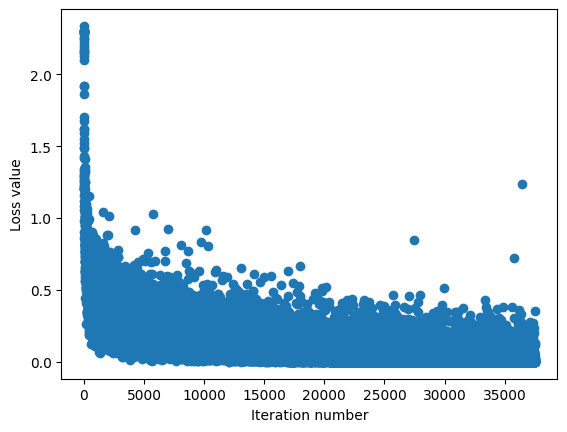

In [ ]:
#torch.manual_seed(0)
model = AlexNet()
model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)  # TODO: choose an optimizer

loss_history = []
for epoch in range(20):

  model.train()

  for batch, (images, labels) in enumerate(trainloader_fashionmnist):
    images = images.cuda()
    labels = labels.cuda()

    optimizer.zero_grad()
    lab_out = model.forward(images)
    loss = criterion(lab_out, labels)
    loss.backward()
    optimizer.step()

    with torch.no_grad():
      loss_history.append(loss.item())

  val_acc = eval_acc(model, testloader_fashionmnist)
  print('Train Epoch: {:3} \t Loss: {:F} \t Val Acc: {:F}'.format(epoch, loss.item(), val_acc))

with torch.no_grad():
  plt.plot(loss_history, 'o')
  plt.xlabel('Iteration number')
  plt.ylabel('Loss value')
  plt.show()

Image 1: Predicted: 6, Original: 6


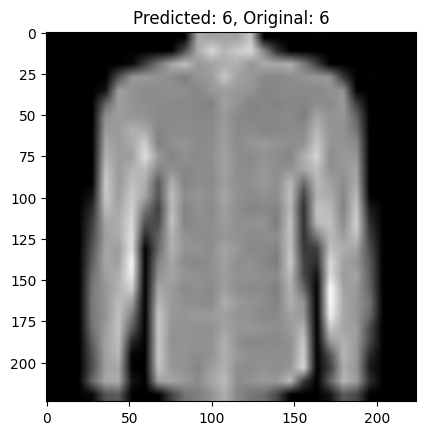

Image 2: Predicted: 4, Original: 2


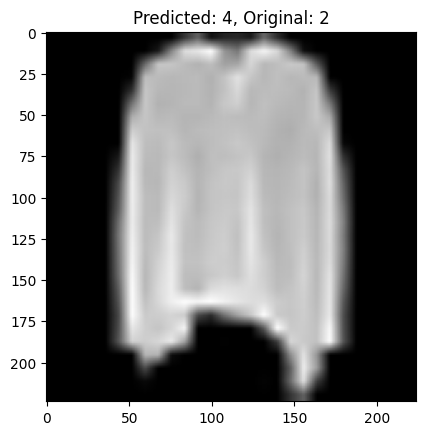

Image 3: Predicted: 2, Original: 2


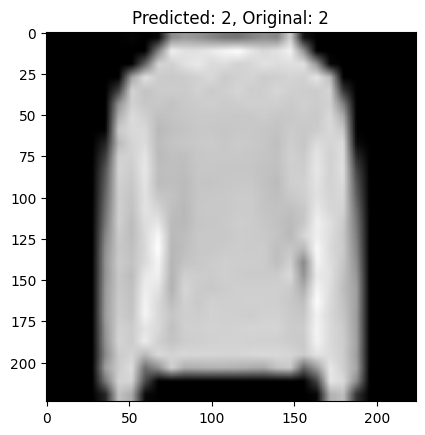

Image 4: Predicted: 4, Original: 4


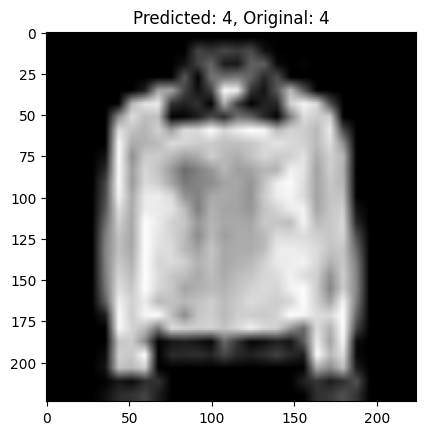

Image 5: Predicted: 1, Original: 1


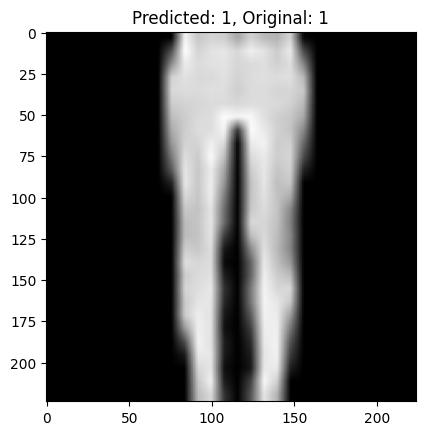

Image 6: Predicted: 3, Original: 4


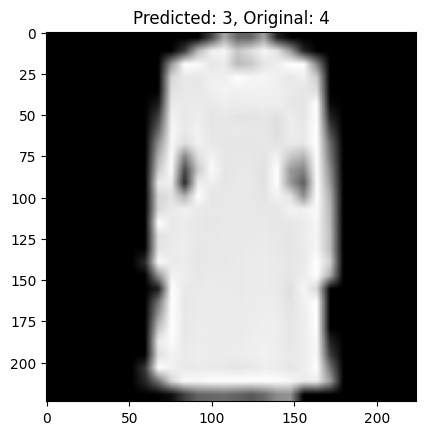

Image 7: Predicted: 0, Original: 0


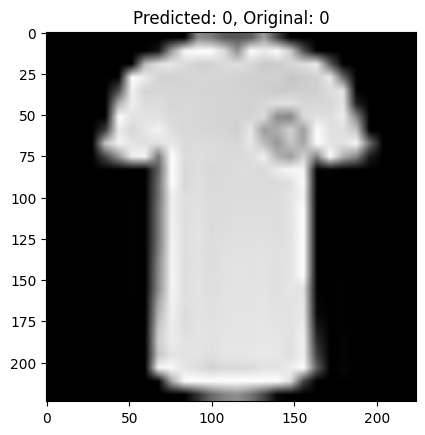

Image 8: Predicted: 2, Original: 2


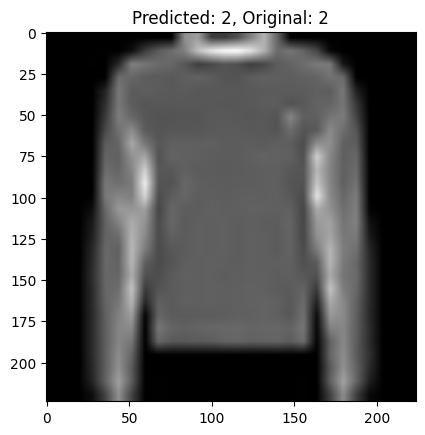

Image 9: Predicted: 8, Original: 8


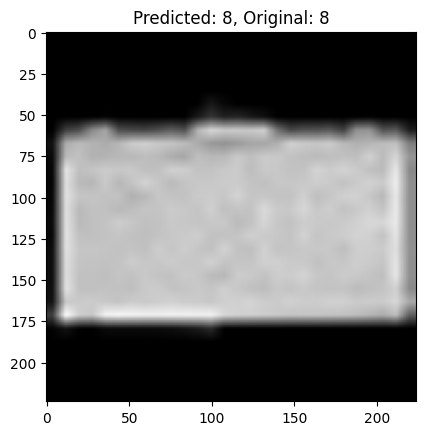

Image 10: Predicted: 0, Original: 0


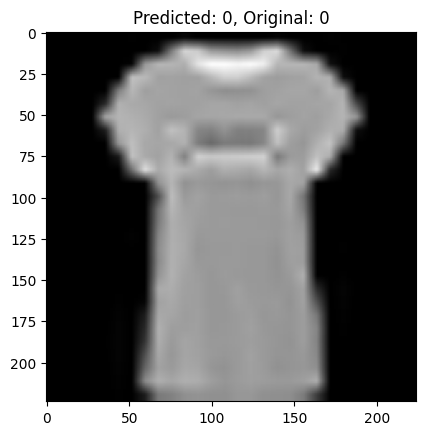

Image 11: Predicted: 9, Original: 9


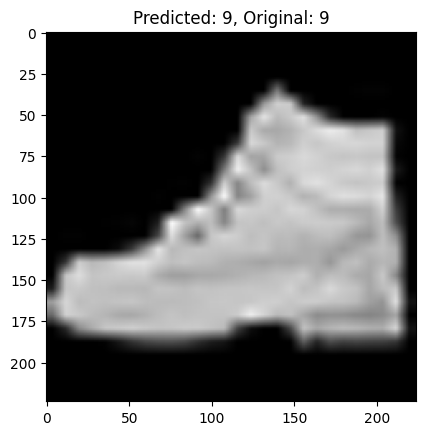

Image 12: Predicted: 8, Original: 8


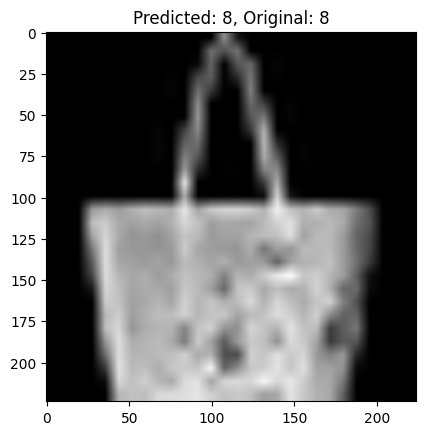

Image 13: Predicted: 5, Original: 5


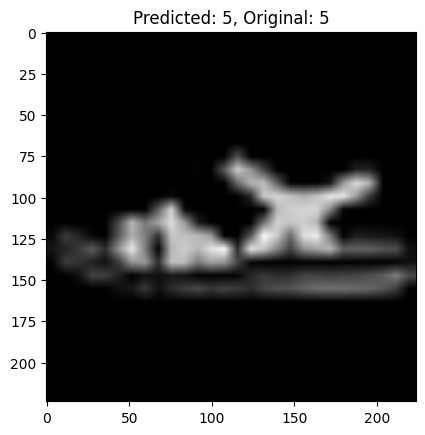

Image 14: Predicted: 5, Original: 5


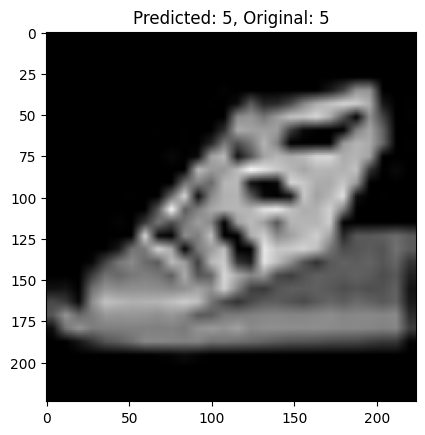

Image 15: Predicted: 7, Original: 7


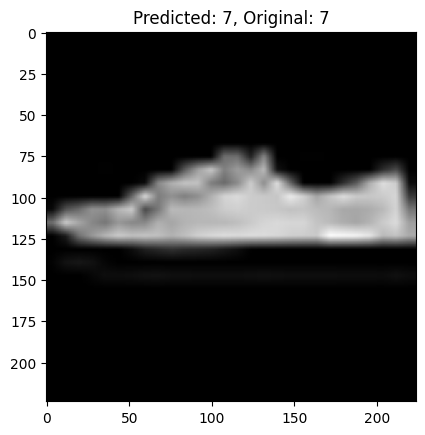

Image 16: Predicted: 0, Original: 0


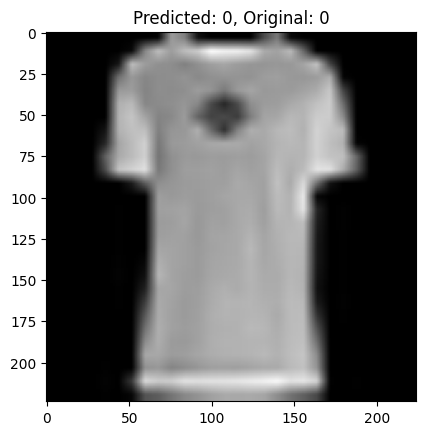

Image 17: Predicted: 1, Original: 1


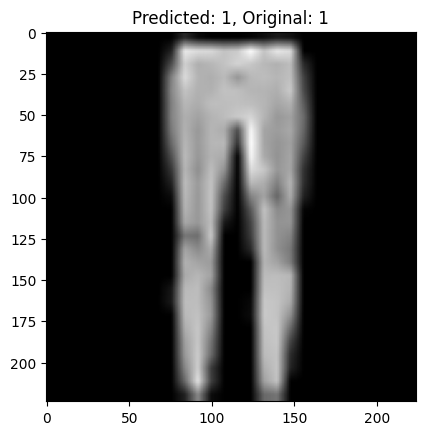

Image 18: Predicted: 5, Original: 5


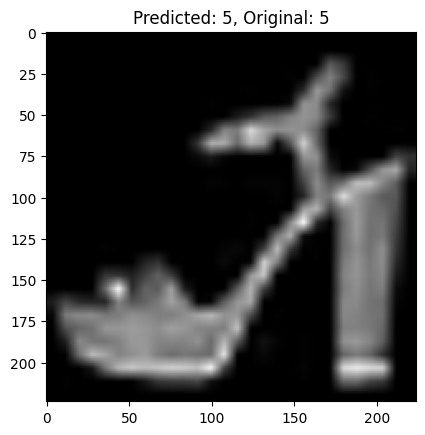

Image 19: Predicted: 0, Original: 0


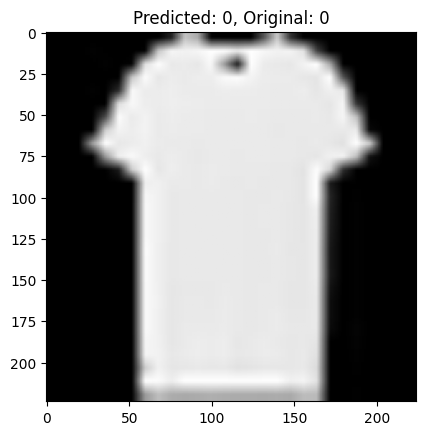

Image 20: Predicted: 9, Original: 9


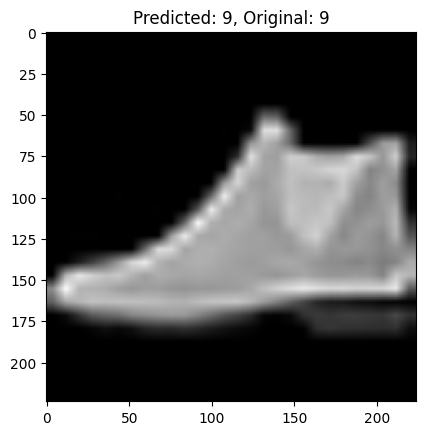

Image 21: Predicted: 8, Original: 8


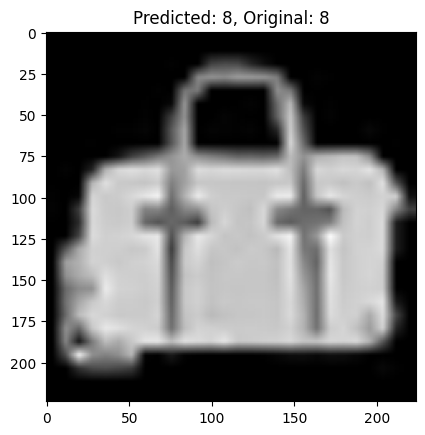

Image 22: Predicted: 9, Original: 9


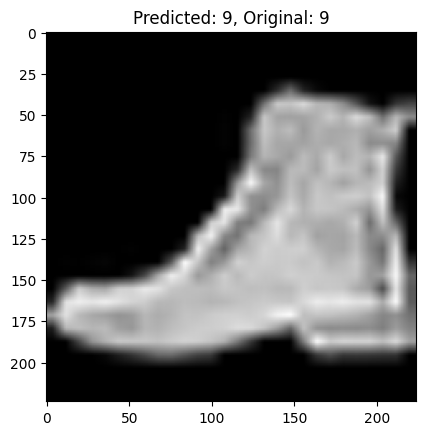

Image 23: Predicted: 6, Original: 6


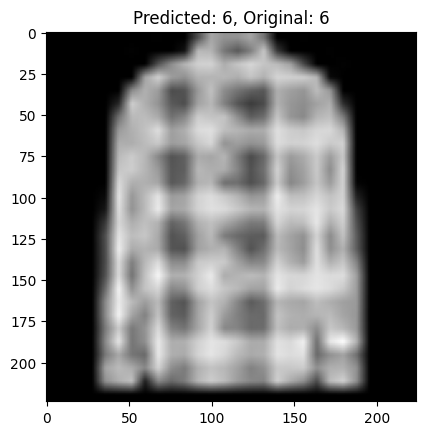

Image 24: Predicted: 0, Original: 0


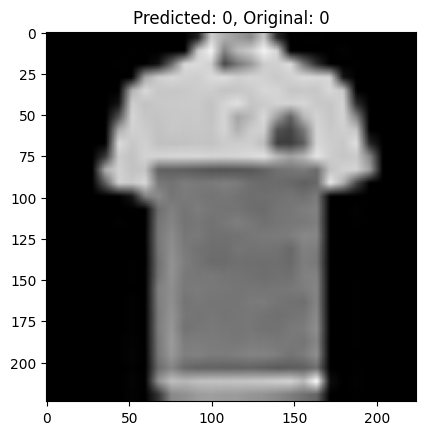

Image 25: Predicted: 9, Original: 9


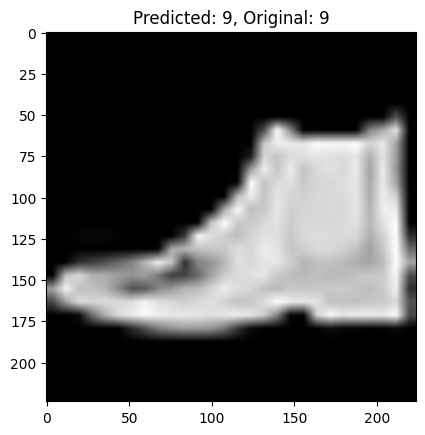

Image 26: Predicted: 3, Original: 3


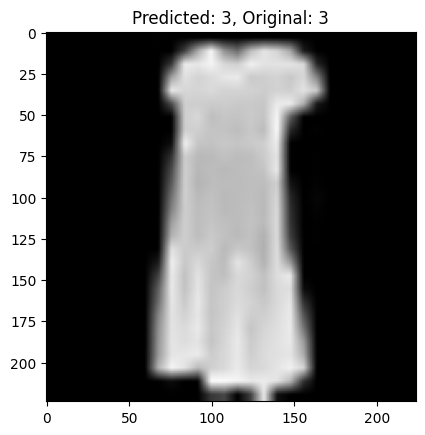

Image 27: Predicted: 9, Original: 9


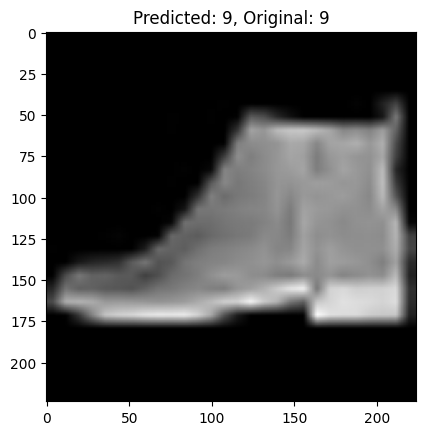

Image 28: Predicted: 2, Original: 2


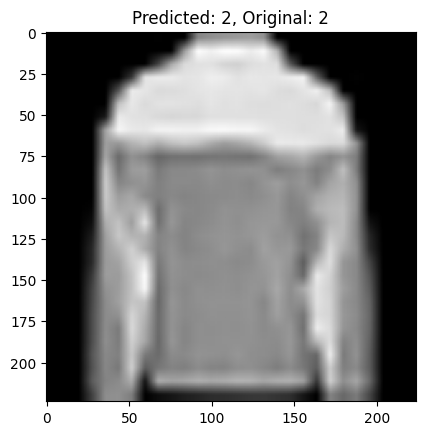

Image 29: Predicted: 2, Original: 2


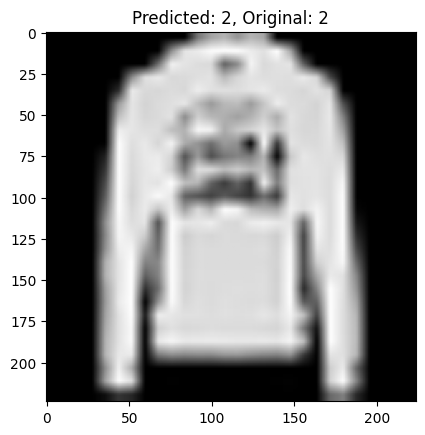

Image 30: Predicted: 1, Original: 1


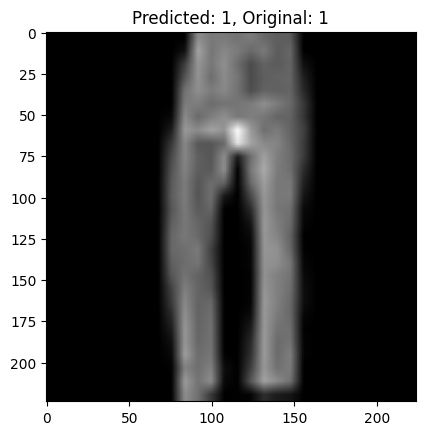

Image 31: Predicted: 8, Original: 8


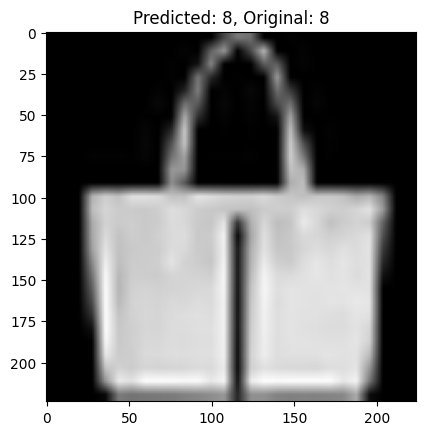

Image 32: Predicted: 2, Original: 2


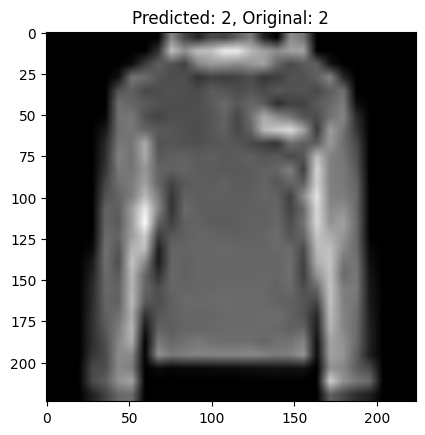

In [ ]:
dataiter = iter(testloader_fashionmnist)
images, labels = next(dataiter)

# Predict labels with the model
outputs = model(images.to('cuda'))
_, predicted = torch.max(outputs, 1)

# Loop through each image in the batch
for i in range(len(images)):
    image = images[i]
    label = labels[i].item()
    prediction = predicted[i].item()

    # Print the predicted and original labels
    print(f'Image {i+1}: Predicted: {prediction}, Original: {label}')

    # Show the image with the predicted and original labels as the title
    imshow(image, f'Predicted: {prediction}, Original: {label}')

## VGG

In [ ]:
def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
    layers.append(nn.ReLU())
    for _ in range(num_convs):
        layers.append(nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

class VGG(nn.Module):
  def __init__(self, arch):
    super().__init__()
    vgg_sequence = []
    for (num_convs, in_channels, out_channels) in arch:
      vgg_sequence.append(vgg_block(num_convs,in_channels,out_channels))
    self.net = nn.Sequential(*vgg_sequence,
                             nn.Flatten(),
                             nn.Linear(25088,4096),nn.ReLU(),nn.Dropout(p=0.5),
                             nn.Linear(4096,4096),nn.ReLU(),nn.Dropout(p=0.5),
                             nn.Linear(4096,10))

  def forward(self,x):
    return self.net(x)

  def predict(self,x):
    outp = self.net(x)
    _, labels_pred = torch.max(outp, 1)
    return labels_pred

In [ ]:
arch = ((1,3,64),(1,64,128),(1,128,256),(1,256,512),(1,512,512))

Train Epoch:   0 	 Loss: 2.309608 	 Val Acc: 10.000000
Train Epoch:   1 	 Loss: 0.657912 	 Val Acc: 75.000000
Train Epoch:   2 	 Loss: 0.075421 	 Val Acc: 87.800000
Train Epoch:   3 	 Loss: 0.340886 	 Val Acc: 89.700000
Train Epoch:   4 	 Loss: 0.199837 	 Val Acc: 90.800000


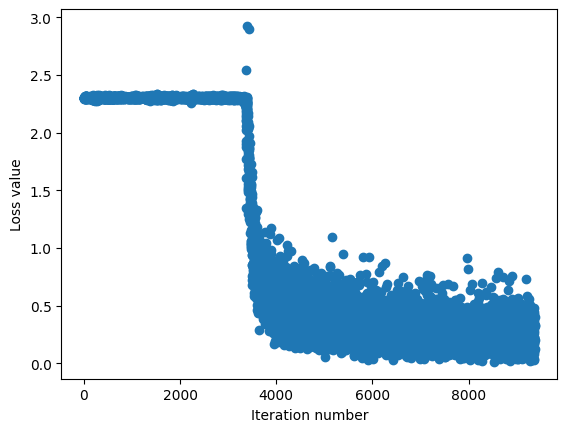

In [ ]:
#torch.manual_seed(0)
model = VGG(arch)
model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum = 0.9)  # TODO: choose an optimizer

loss_history = []
for epoch in range(5):

  model.train()

  for batch, (images, labels) in enumerate(trainloader_fashionmnist):
    images = images.cuda()
    labels = labels.cuda()

    optimizer.zero_grad()
    lab_out = model.forward(images)
    loss = criterion(lab_out, labels)
    loss.backward()
    optimizer.step()

    with torch.no_grad():
      loss_history.append(loss.item())

  val_acc = eval_acc(model, testloader_fashionmnist)
  print('Train Epoch: {:3} \t Loss: {:F} \t Val Acc: {:F}'.format(epoch, loss.item(), val_acc))

with torch.no_grad():
  plt.plot(loss_history, 'o')
  plt.xlabel('Iteration number')
  plt.ylabel('Loss value')
  plt.show()